In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from PIL import Image
import tensorflow as tf
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator

%matplotlib inline

In [ ]:
path = '/content/drive/MyDrive/데이터분석/KDT_AI/COVID_19_train'

img_list = os.listdir(path)
img_list.sort(key = lambda x: int(x.split('.')[0][6:])) # 이미지 넘버순 정렬렬

x_train_full = []

for i in img_list:
    img = Image.open(path+ '/' + i)
    # img = img.resize((224,224)) # 299 > 32 - > 정보손실 
    img_array = np.asarray(img)
    x_train_full.append(img_array)
    print(i, ' 완료, 차원 : ', img_array.shape)

image_001.png  완료, 차원 :  (299, 299)
image_002.png  완료, 차원 :  (299, 299)
image_003.png  완료, 차원 :  (299, 299)
image_004.png  완료, 차원 :  (299, 299)
image_005.png  완료, 차원 :  (299, 299)
image_006.png  완료, 차원 :  (299, 299)
image_007.png  완료, 차원 :  (299, 299)
image_008.png  완료, 차원 :  (299, 299)
image_009.png  완료, 차원 :  (299, 299)
image_010.png  완료, 차원 :  (299, 299)
image_011.png  완료, 차원 :  (299, 299)
image_012.png  완료, 차원 :  (299, 299)
image_013.png  완료, 차원 :  (299, 299)
image_014.png  완료, 차원 :  (299, 299)
image_015.png  완료, 차원 :  (299, 299)
image_016.png  완료, 차원 :  (299, 299)
image_017.png  완료, 차원 :  (299, 299)
image_018.png  완료, 차원 :  (299, 299)
image_019.png  완료, 차원 :  (299, 299)
image_020.png  완료, 차원 :  (299, 299)
image_021.png  완료, 차원 :  (299, 299)
image_022.png  완료, 차원 :  (299, 299)
image_023.png  완료, 차원 :  (299, 299)
image_024.png  완료, 차원 :  (299, 299)
image_025.png  완료, 차원 :  (299, 299)
image_026.png  완료, 차원 :  (299, 299)
image_027.png  완료, 차원 :  (299, 299)
image_028.png  완료, 차원 :  (29

In [ ]:
img = Image.open(path+ '/' + img_list[0])
img = img.resize((32, 32))

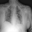

In [ ]:
img

In [ ]:
x_train_full = np.array(x_train_full)

In [ ]:
y_train_full = pd.read_csv('/content/drive/MyDrive/데이터분석/KDT_AI/labels.csv')
y_train_full.head()

,filename,label
0,image_001.png,covid
1,image_002.png,covid
2,image_003.png,normal
3,image_004.png,normal
4,image_005.png,normal


In [ ]:
path = '/content/drive/MyDrive/데이터분석/KDT_AI/COVID_19_test'

img_list_test = os.listdir(path)
img_list_test.sort(key = lambda x: int(x.split('.')[0][6:])) # 이미지 넘버순 정렬렬

x_test = []
for i in img_list_test:
    img = Image.open(path+ '/' + i)
    # img = img.resize((224, 224))
    img_array = np.asarray(img)
    x_test.append(img_array)
    print(i, ' 완료, 차원 : ', img_array.shape)

image_001.png  완료, 차원 :  (299, 299)
image_002.png  완료, 차원 :  (299, 299)
image_003.png  완료, 차원 :  (299, 299)
image_004.png  완료, 차원 :  (299, 299)
image_005.png  완료, 차원 :  (299, 299)
image_006.png  완료, 차원 :  (299, 299)
image_007.png  완료, 차원 :  (299, 299)
image_008.png  완료, 차원 :  (299, 299)
image_009.png  완료, 차원 :  (299, 299)
image_010.png  완료, 차원 :  (299, 299)
image_011.png  완료, 차원 :  (299, 299)
image_012.png  완료, 차원 :  (299, 299)
image_013.png  완료, 차원 :  (299, 299)
image_014.png  완료, 차원 :  (299, 299)
image_015.png  완료, 차원 :  (299, 299)
image_016.png  완료, 차원 :  (299, 299)
image_017.png  완료, 차원 :  (299, 299)
image_018.png  완료, 차원 :  (299, 299)
image_019.png  완료, 차원 :  (299, 299)
image_020.png  완료, 차원 :  (299, 299)
image_021.png  완료, 차원 :  (299, 299)
image_022.png  완료, 차원 :  (299, 299)
image_023.png  완료, 차원 :  (299, 299)
image_024.png  완료, 차원 :  (299, 299)
image_025.png  완료, 차원 :  (299, 299)
image_026.png  완료, 차원 :  (299, 299)
image_027.png  완료, 차원 :  (299, 299)
image_028.png  완료, 차원 :  (29

In [ ]:
x_test = np.array(x_test)

In [ ]:
tf.random.set_seed(221)

In [ ]:
x_train_full.max()

255

In [ ]:

for i in range(len(y_train_full)):
    if y_train_full['label'][i] == 'covid':
        y_train_full['label'][i] = 1
    else:
        y_train_full['label'][i] = 0
                
y_train_full

,filename,label
0,image_001.png,1
1,image_002.png,1
2,image_003.png,0
3,image_004.png,0
4,image_005.png,0
...,...,...
1995,image_1996.png,1
1996,image_1997.png,0
1997,image_1998.png,1
1998,image_1999.png,0


In [ ]:
y_train_full = to_categorical(y_train_full.label) # y값 category화 

In [ ]:
rows = x_train_full.shape[1]
cols = x_train_full.shape[2]

model = Sequential()

model.add(Conv2D(32, kernel_size = (3,3), activation = 'relu', padding='same', input_shape = (rows, cols, 1)))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(32, kernel_size = (3,3), padding='same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.1))

model.add(Conv2D(64, kernel_size = (3,3), padding='same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

# model.add(Conv2D(64, kernel_size= (3,3), padding='same', activation = 'relu'))
# model.add(MaxPooling2D(pool_size = (2,2)))
# model.add(Dropout(0.3))

# model.add(Conv2D(128, kernel_size= (3,3), padding='same', activation = 'relu'))
# model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, kernel_size= (3,3), padding='same', activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.1))

model.add(Flatten())

model.add(Dense(256, activation = 'relu'))

model.add(Dense(2, activation = 'softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 299, 299, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 149, 149, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 74, 74, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 74, 74, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 74, 74, 64)        1

In [ ]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [ ]:
def graph(h):
    history_dict = h.history
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    fig = plt.figure(figsize = (8, 4))

    ax1 = fig.add_subplot(1, 2, 1)
    ax1.plot(epochs, loss, color = 'blue', label = 'train_loss')
    ax1.plot(epochs, val_loss, color = 'red', label = 'val_loss')
    ax1.set_title('train, val loss')
    ax1.grid()
    ax1.legend()

    accuracy = history_dict['accuracy']
    val_accuracy = history_dict['val_accuracy']

    ax2 = fig.add_subplot(1, 2, 2)
    ax2.plot(epochs, accuracy, color = 'blue', label = 'train_accuracy')
    ax2.plot(epochs, val_accuracy, color = 'red', label = 'val_accuracy')
    ax2.set_title('train, val accuracy')
    ax2.grid()
    ax2.legend()

    plt.show()

In [ ]:
y_train_full

array([[0., 1.],
       [0., 1.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]], dtype=float32)

In [ ]:
x_train_full.shape

(2000, 299, 299)

In [ ]:
# data_gen = ImageDataGenerator(width_shift_range=0.15,
#                                  height_shift_range=0.15,
#                                  zoom_range=0.15,
#                                  horizontal_flip=True,
#                                  fill_mode='nearest')
# # x_test  = ImageDataGenerator(rescale = 1.0/255.)

In [ ]:
# x_train_agg = data_gen(x = x_train_full, y = y_train_full, )

AttributeError: ignored

Epoch 1/10
20/20 [==============================] - 19s 275ms/step - loss: 0.6908 - accuracy: 0.5633 - val_loss: 0.6214 - val_accuracy: 0.6500
Epoch 2/10
20/20 [==============================] - 5s 239ms/step - loss: 0.5294 - accuracy: 0.7391 - val_loss: 0.4826 - val_accuracy: 0.7812
Epoch 3/10
20/20 [==============================] - 5s 242ms/step - loss: 0.4529 - accuracy: 0.7914 - val_loss: 0.4865 - val_accuracy: 0.8250
Epoch 4/10
20/20 [==============================] - 5s 241ms/step - loss: 0.3854 - accuracy: 0.8344 - val_loss: 0.3810 - val_accuracy: 0.8625
Epoch 5/10
20/20 [==============================] - 5s 238ms/step - loss: 0.3445 - accuracy: 0.8586 - val_loss: 0.3688 - val_accuracy: 0.8719
Epoch 6/10
20/20 [==============================] - 5s 243ms/step - loss: 0.2708 - accuracy: 0.8883 - val_loss: 0.4410 - val_accuracy: 0.8188
Epoch 7/10
20/20 [==============================] - 5s 252ms/step - loss: 0.2291 - accuracy: 0.9117 - val_loss: 0.3933 - val_accuracy: 0.8750
Epoch

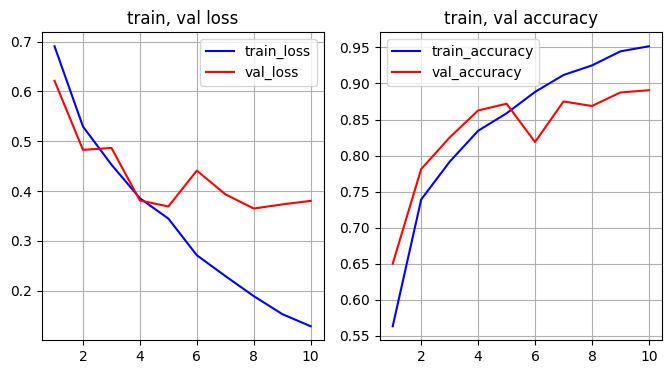

Epoch 1/10
20/20 [==============================] - 5s 268ms/step - loss: 0.1791 - accuracy: 0.9375 - val_loss: 0.3209 - val_accuracy: 0.8906
Epoch 2/10
20/20 [==============================] - 5s 253ms/step - loss: 0.1084 - accuracy: 0.9586 - val_loss: 0.4188 - val_accuracy: 0.8500
Epoch 3/10
20/20 [==============================] - 5s 246ms/step - loss: 0.0793 - accuracy: 0.9695 - val_loss: 0.3330 - val_accuracy: 0.8938
Epoch 4/10
20/20 [==============================] - 5s 255ms/step - loss: 0.0611 - accuracy: 0.9773 - val_loss: 0.4008 - val_accuracy: 0.8906
Epoch 5/10
20/20 [==============================] - 5s 253ms/step - loss: 0.0425 - accuracy: 0.9844 - val_loss: 0.4048 - val_accuracy: 0.8781
Epoch 6/10
20/20 [==============================] - 5s 255ms/step - loss: 0.0537 - accuracy: 0.9773 - val_loss: 0.4491 - val_accuracy: 0.8906
Epoch 7/10
20/20 [==============================] - 5s 245ms/step - loss: 0.0472 - accuracy: 0.9836 - val_loss: 0.4873 - val_accuracy: 0.8687
Epoch 

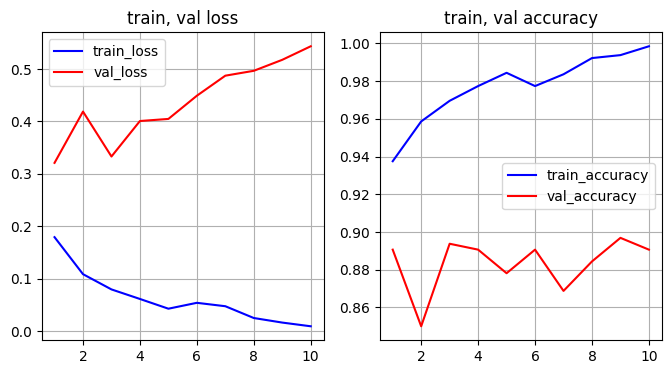

Epoch 1/10
20/20 [==============================] - 5s 266ms/step - loss: 0.0363 - accuracy: 0.9852 - val_loss: 0.4402 - val_accuracy: 0.8906
Epoch 2/10
20/20 [==============================] - 5s 258ms/step - loss: 0.0292 - accuracy: 0.9883 - val_loss: 0.4848 - val_accuracy: 0.8969
Epoch 3/10
20/20 [==============================] - 5s 254ms/step - loss: 0.0208 - accuracy: 0.9930 - val_loss: 0.5420 - val_accuracy: 0.8938
Epoch 4/10
20/20 [==============================] - 5s 250ms/step - loss: 0.0239 - accuracy: 0.9922 - val_loss: 0.6031 - val_accuracy: 0.8938
Epoch 5/10
20/20 [==============================] - 5s 260ms/step - loss: 0.0103 - accuracy: 0.9977 - val_loss: 0.5752 - val_accuracy: 0.8781
Epoch 6/10
20/20 [==============================] - 5s 252ms/step - loss: 0.0048 - accuracy: 1.0000 - val_loss: 0.6164 - val_accuracy: 0.8906
Epoch 7/10
20/20 [==============================] - 5s 256ms/step - loss: 0.0124 - accuracy: 0.9953 - val_loss: 0.5818 - val_accuracy: 0.8813
Epoch 

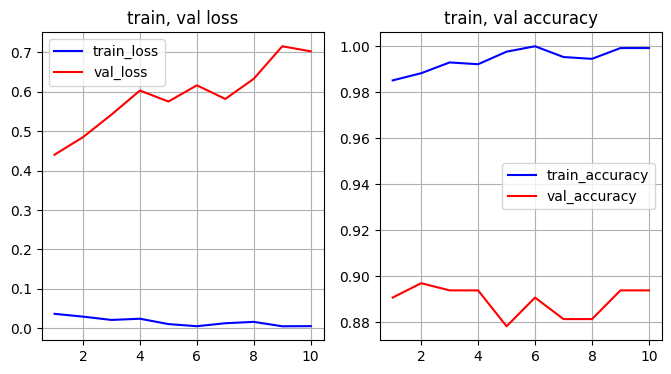

Epoch 1/10
20/20 [==============================] - 5s 272ms/step - loss: 0.0164 - accuracy: 0.9937 - val_loss: 0.6615 - val_accuracy: 0.8813
Epoch 2/10
20/20 [==============================] - 5s 245ms/step - loss: 0.0111 - accuracy: 0.9977 - val_loss: 0.5274 - val_accuracy: 0.9000
Epoch 3/10
20/20 [==============================] - 5s 257ms/step - loss: 0.0161 - accuracy: 0.9945 - val_loss: 0.8401 - val_accuracy: 0.8875
Epoch 4/10
20/20 [==============================] - 5s 254ms/step - loss: 0.0216 - accuracy: 0.9922 - val_loss: 0.6409 - val_accuracy: 0.8719
Epoch 5/10
20/20 [==============================] - 5s 246ms/step - loss: 0.0056 - accuracy: 0.9984 - val_loss: 0.6529 - val_accuracy: 0.8938
Epoch 6/10
20/20 [==============================] - 5s 263ms/step - loss: 0.0039 - accuracy: 0.9984 - val_loss: 0.7079 - val_accuracy: 0.8781
Epoch 7/10
20/20 [==============================] - 5s 257ms/step - loss: 0.0075 - accuracy: 0.9977 - val_loss: 0.5969 - val_accuracy: 0.9031
Epoch 

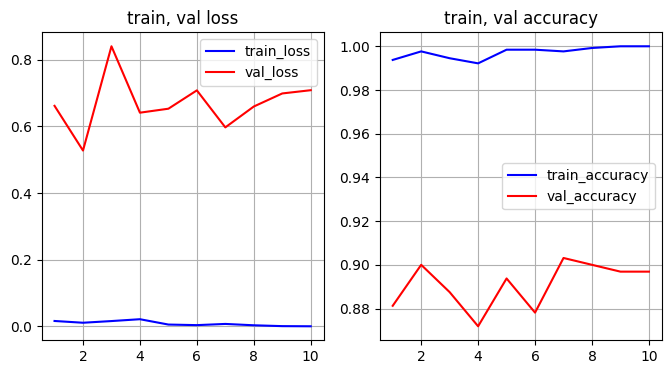

Epoch 1/10
20/20 [==============================] - 5s 272ms/step - loss: 0.0027 - accuracy: 0.9984 - val_loss: 0.5754 - val_accuracy: 0.9062
Epoch 2/10
20/20 [==============================] - 5s 255ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.7624 - val_accuracy: 0.8969
Epoch 3/10
20/20 [==============================] - 5s 260ms/step - loss: 0.0021 - accuracy: 0.9992 - val_loss: 0.8001 - val_accuracy: 0.8969
Epoch 4/10
20/20 [==============================] - 5s 251ms/step - loss: 8.1694e-04 - accuracy: 1.0000 - val_loss: 0.6598 - val_accuracy: 0.9031
Epoch 5/10
20/20 [==============================] - 5s 259ms/step - loss: 0.0016 - accuracy: 0.9992 - val_loss: 0.6345 - val_accuracy: 0.9094
Epoch 6/10
20/20 [==============================] - 5s 259ms/step - loss: 0.0026 - accuracy: 0.9992 - val_loss: 0.5944 - val_accuracy: 0.9219
Epoch 7/10
20/20 [==============================] - 5s 254ms/step - loss: 0.0157 - accuracy: 0.9937 - val_loss: 0.7769 - val_accuracy: 0.9031
Ep

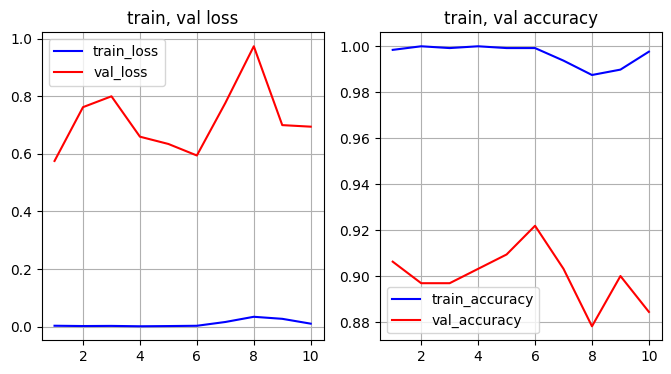

In [ ]:
KF = KFold(n_splits = 5, shuffle = True, random_state = 221)

x_train_full = x_train_full / 255
x_test = x_test / 255
i = 1
results = []
for x_train_idx, x_val_idx in KF.split(x_train_full):
    x_train, x_val = x_train_full[x_train_idx], x_train_full[x_val_idx]
    y_train, y_val = y_train_full[x_train_idx], y_train_full[x_val_idx]

    history = model.fit(x_train, y_train,
                    epochs = 10,
                    batch_size = 64,
                    validation_split = 0.2)
    
    result = model.evaluate(x_val, y_val)
    print(f'{i}fold :', result[1])
    results.append(result[1])
    graph(history)

    i += 1
    

In [ ]:
sum(results)/5

0.9490000009536743

In [ ]:
model

나만의 base line을 만들자!  
